### Ciência dos dados [Projeto 3]: PNADC - Uso dos microdados de 2023
### Profa Orientadora: Maria Kelly Venezuela
### Grupo 8:
    - Guilherme Mitsuo Yabushita Nakama
    - Lina Furukawa Queiros
    - Lucca de Magalhães Castro Fernandes
    - Maria Clara Hirano
___

In [47]:
import os
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

In [48]:
pnad23_2_all = pd.read_csv('pnad23_2.csv', sep=';')
pnad23_2_all

,Unnamed: 0,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,...,V1028191,V1028192,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200
0,0,2023,2,11,11.0,NaN,110000016,1110011,1,10,...,451.548556,200.231600,239.078436,508.791587,0.000000,0.000000,515.061463,0.000000,0.0,225.178143
1,1,2023,2,11,11.0,NaN,110000016,1110011,1,10,...,451.548556,200.231600,239.078436,508.791587,0.000000,0.000000,515.061463,0.000000,0.0,225.178143
2,2,2023,2,11,11.0,NaN,110000016,1110011,2,10,...,217.964623,98.704681,108.979781,230.958261,0.000000,0.000000,248.378245,0.000000,0.0,111.051514
3,3,2023,2,11,11.0,NaN,110000016,1110011,3,10,...,452.393952,212.449131,229.969963,498.761017,0.000000,0.000000,532.511276,0.000000,0.0,229.261311
4,4,2023,2,11,11.0,NaN,110000016,1110011,3,10,...,452.393952,212.449131,229.969963,498.761017,0.000000,0.000000,532.511276,0.000000,0.0,229.261311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474570,474570,2023,2,53,53.0,NaN,530060880,5310111,13,11,...,393.082569,0.000000,0.000000,416.131491,806.942713,406.701836,399.331903,408.248725,0.0,0.000000
474571,474571,2023,2,53,53.0,NaN,530060880,5310111,13,11,...,393.082569,0.000000,0.000000,416.131491,806.942713,406.701836,399.331903,408.248725,0.0,0.000000
474572,474572,2023,2,53,53.0,NaN,530060880,5310111,14,11,...,306.219511,0.000000,0.000000,317.890988,654.353840,322.037855,306.475497,312.130129,0.0,0.000000
474573,474573,2023,2,53,53.0,NaN,530060880,5310111,14,11,...,306.219511,0.000000,0.000000,317.890988,654.353840,322.037855,306.475497,312.130129,0.0,0.000000


In [49]:
# Colunas selecionadas:
colunas = ['Ano',
           'Trimestre',
           'UF',    # Estado
           'V1022', # Situação do domicílio
           'V2007', # Sexo
           'V2009', # Idade
           'V2010', # Cor ou raça
           'VD3004', # Nível de instrução mais elevado alcançado
           'VD4002', # Condição na ocupação do trabalho principal
           'VD4007', # Posição na ocupação do trabalho principal
           'VD4020',] # Rendimento bruto mensal de todos os trabalhos

# Leitura da base de dados filtrando apenas as colunas contidas na lista 'colunas'
pnad23_2_small = pd.read_csv('pnad23_2.csv', sep=';', usecols=colunas)

# Renomeando as colunas para facilitar a compreensão
pnad23_2_small.rename(columns={'V1022':'Area',
                               'V2007':'Sexo',
                               'V2009':'Idade',
                               'V2010':'Cor_Raca',
                               'VD3004':'Escolaridade',
                               'VD4002':'Ocupacao',
                               'VD4007':'Trabalho',
                               'VD4020':'Renda'}, inplace=True)
pnad23_2_small

,Ano,Trimestre,UF,Area,Sexo,Idade,Cor_Raca,Escolaridade,Ocupacao,Trabalho,Renda
0,2023,2,11,1,1,30,4,5.0,1.0,3.0,5000.0
1,2023,2,11,1,2,29,4,5.0,NaN,NaN,NaN
2,2023,2,11,1,2,50,4,7.0,1.0,1.0,3500.0
3,2023,2,11,1,2,25,4,5.0,NaN,NaN,NaN
4,2023,2,11,1,2,2,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
474570,2023,2,53,1,1,38,1,7.0,1.0,1.0,10000.0
474571,2023,2,53,1,2,30,1,7.0,1.0,1.0,2500.0
474572,2023,2,53,1,1,51,1,7.0,1.0,1.0,4000.0
474573,2023,2,53,1,2,56,1,7.0,1.0,1.0,5000.0


In [50]:
pnad23_2_small.UF = pnad23_2_small.UF.astype('category')
pnad23_2_small.UF = pnad23_2_small.UF.cat.rename_categories({11:'Rondônia',
                                                             12:'Acre',
                                                             13:'Amazonas',
                                                             14:'Roraima',
                                                             15:'Pará',
                                                             16:'Amapá',
                                                             17:'Tocantins', 
                                                             21:'Maranhão',
                                                             22:'Piauí',
                                                             23:'Ceará',
                                                             24:'Rio Grande do Norte',
                                                             25:'Paraíba',
                                                             26:'Pernambuco',
                                                             27:'Alagoas',
                                                             28:'Sergipe',
                                                             29:'Bahia',
                                                             31:'Minas Gerais',
                                                             32:'Espírito Santo',
                                                             33:'Rio de Janeiro',
                                                             35:'São Paulo',
                                                             41:'Paraná',
                                                             42:'Santa Catarina',
                                                             43:'Rio Grande do Sul',
                                                             50:'Mato Grosso do Sul',
                                                             51:'Mato Grosso',
                                                             52:'Goiás',
                                                             53:'Distrito Federal',})
pnad23_2_small.UF.value_counts(True).round(3)*100

UF
São Paulo              7.8
Minas Gerais           7.4
Rio de Janeiro         7.1
Maranhão               6.5
Santa Catarina         6.4
Paraná                 5.3
Rio Grande do Sul      5.3
Bahia                  4.8
Ceará                  4.7
Alagoas                4.2
Pernambuco             4.1
Pará                   3.7
Espírito Santo         3.6
Goiás                  3.3
Amazonas               3.0
Mato Grosso            2.7
Paraíba                2.6
Piauí                  2.3
Mato Grosso do Sul     2.2
Rio Grande do Norte    2.0
Acre                   2.0
Distrito Federal       1.9
Sergipe                1.9
Rondônia               1.7
Tocantins              1.5
Roraima                1.2
Amapá                  0.9
Name: proportion, dtype: float64

In [51]:
pnad23_2_small.Area = pnad23_2_small.Area.astype('category')
pnad23_2_small.Area = pnad23_2_small.Area.cat.rename_categories({1:'Urbana',
                                                                 2:'Rural'})
pnad23_2_small.Area.value_counts(True).round(3)*100

Area
Urbana    73.4
Rural     26.6
Name: proportion, dtype: float64

In [52]:
pnad23_2_small.Sexo = pnad23_2_small.Sexo.astype('category')
pnad23_2_small.Sexo = pnad23_2_small.Sexo.cat.rename_categories({1:'Homem',
                                                                 2:'Mulher'})
pnad23_2_small.Sexo.value_counts(True).round(3)*100

Sexo
Mulher    51.6
Homem     48.4
Name: proportion, dtype: float64

In [53]:
pnad23_2_small.Cor_Raca = pnad23_2_small.Cor_Raca.astype('category')
pnad23_2_small.Cor_Raca = pnad23_2_small.Cor_Raca.cat.rename_categories({1:'Branca',
                                                                         2:'Preta',
                                                                         3:'Amarela',
                                                                         4:'Parda',
                                                                         5:'Indígena',
                                                                         9:'Ignorado'})
pnad23_2_small.Cor_Raca.value_counts(True).round(3)*100

Cor_Raca
Parda       49.8
Branca      39.4
Preta        9.7
Amarela      0.6
Indígena     0.6
Ignorado     0.0
Name: proportion, dtype: float64

In [54]:
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.astype('category')
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.cat.rename_categories({1:'Sem Instrução e menos de 1 ano de estudo',
                                                                                 2:'Fundamental incompleto ou equivalente',
                                                                                 3:'Fundamental completo ou equivalente',
                                                                                 4:'Médio incompleto ou equivalente',
                                                                                 5:'Médio completo ou equivalente',
                                                                                 6:'Superior incompleto ou equivalente',
                                                                                 7:'Superior completo',
                                                                                 '':'Não aplicável'})
pnad23_2_small.Escolaridade.value_counts(True).round(3)*100

Escolaridade
Fundamental incompleto ou equivalente       35.9
Médio completo ou equivalente               24.2
Superior completo                           12.2
Sem Instrução e menos de 1 ano de estudo     9.3
Fundamental completo ou equivalente          7.6
Médio incompleto ou equivalente              6.9
Superior incompleto ou equivalente           3.9
Name: proportion, dtype: float64

In [55]:
pnad23_2_small.Trabalho = pnad23_2_small.Trabalho.astype('category')
pnad23_2_small.Trabalho = pnad23_2_small.Trabalho.cat.rename_categories({1:'Empregado',
                                                                         2:'Empregador',
                                                                         3:'Conta própria',
                                                                         4:'Trabalhador familiar auxiliar',
                                                                         '':'Não aplicável',})
pnad23_2_small.Trabalho.value_counts(True).round(3)*100

Trabalho
Empregado                        65.2
Conta própria                    28.2
Empregador                        4.0
Trabalhador familiar auxiliar     2.6
Name: proportion, dtype: float64

In [56]:
pnad23_2_small.Ocupacao = pnad23_2_small.Ocupacao.astype('category')
pnad23_2_small.Ocupacao = pnad23_2_small.Ocupacao.cat.rename_categories({1:'Ocupado',
                                                                         2:'Desocupado',})
pnad23_2_small.Ocupacao.value_counts(True).round(3)*100

Ocupacao
Ocupado       92.5
Desocupado     7.5
Name: proportion, dtype: float64

In [63]:
siglas_UF = {'Rondônia':'RO',
             'Acre':'AC',
             'Amazonas':'AM',
             'Roraima':'RR',
             'Pará':'PA',
             'Amapá':'AP',
             'Tocantins':'TO', 
             'Maranhão':'MA',
             'Piauí':'PI',
             'Ceará':'CE',
             'Rio Grande do Norte':'RN',
             'Paraíba':'PB',
             'Pernambuco':'PE',
             'Alagoas':'AL',
             'Sergipe':'SE',
             'Bahia':'BA',
             'Minas Gerais':'MG',
             'Espírito Santo':'ES',
             'Rio de Janeiro':'RJ',
             'São Paulo':'SP',
             'Paraná':'PR',
             'Santa Catarina':'SC',
             'Rio Grande do Sul':'RS',
             'Mato Grosso do Sul':'MS',
             'Mato Grosso':'MT',
             'Goiás':'GO',
             'Distrito Federal':'DF'}
pnad23_2_small.UF = pnad23_2_small.UF.map(siglas_UF)


siglas_escolaridade = {'Sem Instrução e menos de 1 ano de estudo':'Menos de 1 ano de estudo',
                       'Fundamental incompleto ou equivalente':'EF incompleto',
                       'Fundamental completo ou equivalente':'EF completo',
                       'Médio incompleto ou equivalente':'EM incompleto',
                       'Médio completo ou equivalente':'EM completo',
                       'Superior incompleto ou equivalente':'Superior incompleto',
                       'Superior completo':'Superior completo',
                       'Não aplicável':'NA'}
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.map(siglas_escolaridade)

In [64]:
pessoas_ocupadas = pnad23_2_small.loc[pnad23_2_small['Ocupacao'] == 'Ocupado']
empregados = pnad23_2_small.loc[pnad23_2_small['Trabalho'] == 'Empregado']

In [66]:
# Salvando a base de dados small em CSV para reduzir o tempo de processamento
empregados.to_csv('P3_small.csv', sep=';', index=False)
dados_small = pd.read_csv('P3_small.csv', sep=';')
dados_small

,Ano,Trimestre,UF,Area,Sexo,Idade,Cor_Raca,Escolaridade,Ocupacao,Trabalho,Renda
0,2023,2,RO,Urbana,Mulher,50,Parda,Superior completo,Ocupado,Empregado,3500.0
1,2023,2,RO,Urbana,Mulher,54,Branca,Superior completo,Ocupado,Empregado,3700.0
2,2023,2,RO,Urbana,Homem,59,Preta,EF completo,Ocupado,Empregado,3000.0
3,2023,2,RO,Urbana,Homem,38,Parda,Superior completo,Ocupado,Empregado,3000.0
4,2023,2,RO,Urbana,Mulher,62,Parda,EF completo,Ocupado,Empregado,800.0
...,...,...,...,...,...,...,...,...,...,...,...
132337,2023,2,DF,Urbana,Mulher,28,Branca,Superior completo,Ocupado,Empregado,7000.0
132338,2023,2,DF,Urbana,Homem,38,Branca,Superior completo,Ocupado,Empregado,10000.0
132339,2023,2,DF,Urbana,Mulher,30,Branca,Superior completo,Ocupado,Empregado,2500.0
132340,2023,2,DF,Urbana,Homem,51,Branca,Superior completo,Ocupado,Empregado,4000.0


<Figure size 1000x600 with 0 Axes>

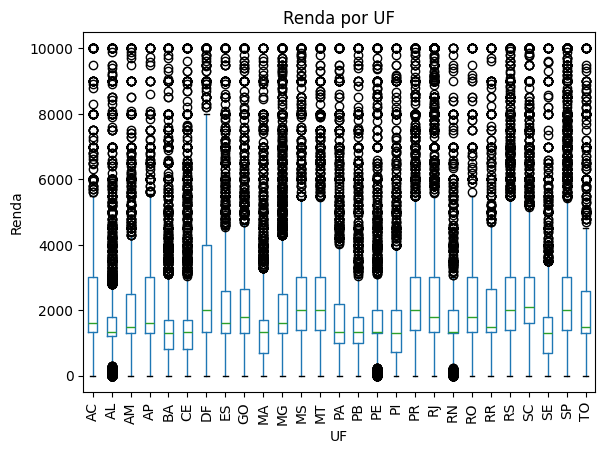

<Figure size 1000x600 with 0 Axes>

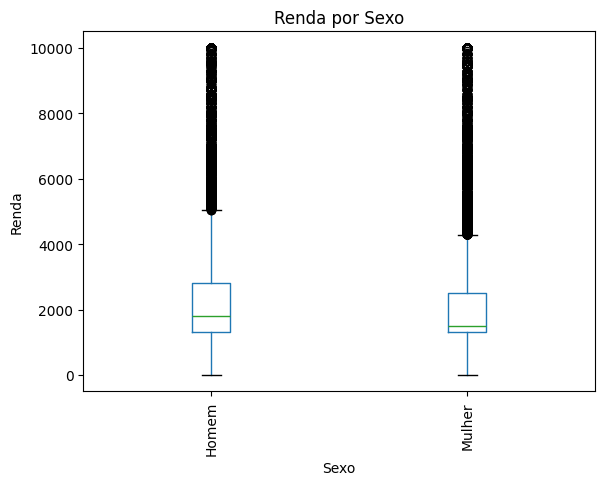

<Figure size 1000x600 with 0 Axes>

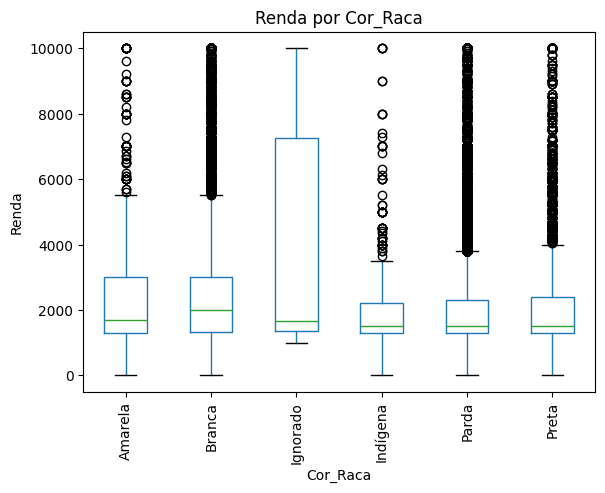

<Figure size 1000x600 with 0 Axes>

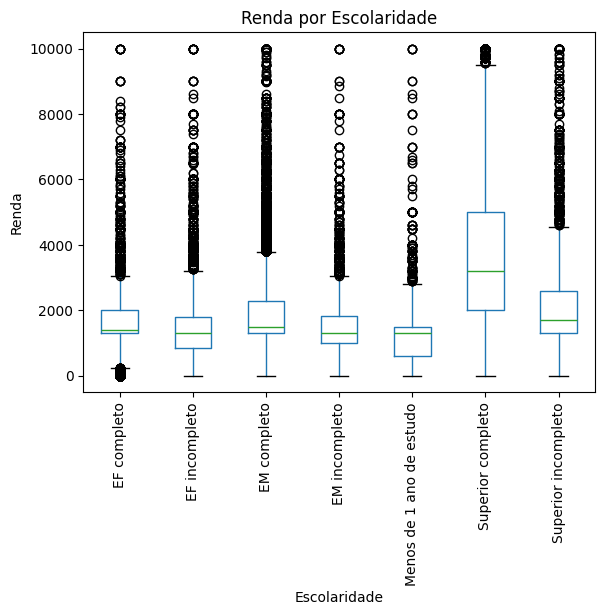

<Figure size 1000x600 with 0 Axes>

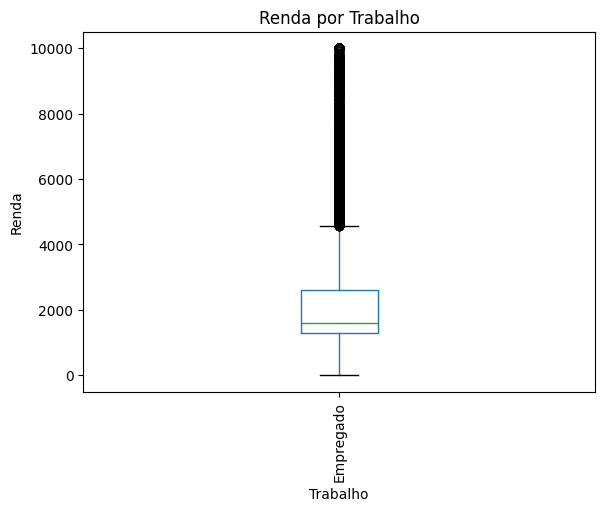

<Figure size 1000x600 with 0 Axes>

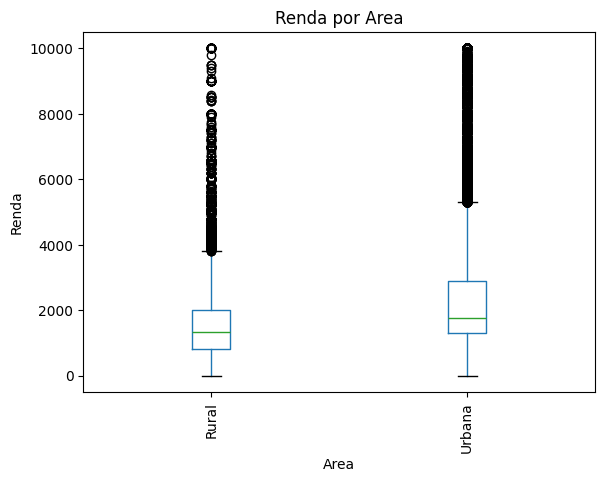

In [134]:
# Definição da função auxiliar para boxplots com limitação de faixa de renda
def boxplot_renda_por_variavel(df, variavel, limite):
    plt.figure(figsize=(10,6))

    # Filtra os dados para excluir valores acima do limite superior
    df_filtrado = df[df.Renda <= limite]

    df_filtrado.boxplot(column='Renda', by=variavel, grid=False)
    plt.title(f'Renda por {variavel}')
    plt.suptitle('')
    plt.xlabel(variavel)
    plt.xticks(rotation=90)  # Rotacionar rótulos para melhor visualização
    plt.ylabel('Renda')
    plt.show()

# Encontrando o limite superior baseado em um percentil da renda
limite_97 = dados_small.Renda.quantile(0.97)

# Chamar a função para cada variável categórica com o limite superior definido
variaveis = ['UF','Sexo', 'Cor_Raca', 'Escolaridade', 'Trabalho', 'Area']
for variavel in variaveis:
    boxplot_renda_por_variavel(dados_small, variavel, limite_97)

In [69]:
dados_small.describe()

,Ano,Trimestre,Idade,Renda
count,132342.0,132342.0,132342.000000,132127.000000
mean,2023.0,2.0,38.663773,2686.639128
std,0.0,0.0,12.866795,3835.545905
min,2023.0,2.0,14.000000,0.000000
25%,2023.0,2.0,28.000000,1302.000000
50%,2023.0,2.0,38.000000,1700.000000
75%,2023.0,2.0,48.000000,2849.000000
max,2023.0,2.0,103.000000,300000.000000


In [70]:
dados_small.isnull().sum()

Ano               0
Trimestre         0
UF                0
Area              0
Sexo              0
Idade             0
Cor_Raca          0
Escolaridade      0
Ocupacao          0
Trabalho          0
Renda           215
dtype: int64

In [126]:
dummies_UF = pd.get_dummies(dados_small['UF'],drop_first=True,dtype='int64')
dummies_UF

,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132337,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132338,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132339,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132340,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
dummies_Sexo = pd.get_dummies(dados_small['Sexo'],drop_first=True,dtype='int64')

In [104]:
dummies_Cor_Raca = pd.get_dummies(dados_small['Cor_Raca'],drop_first=True,dtype='int64')

In [105]:
dummies_Escolaridade = pd.get_dummies(dados_small['Escolaridade'],drop_first=True,dtype='int64')

In [125]:
dummies_Area = pd.get_dummies(dados_small['Area'],drop_first=True,dtype='int64')

In [107]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [129]:
dados_small_dummies = pd.concat([dados_small, dummies_UF, dummies_Sexo, dummies_Cor_Raca, dummies_Escolaridade, dummies_Area], axis=1)
dados_small_dummies.columns

Index(['Ano', 'Trimestre', 'UF', 'Area', 'Sexo', 'Idade', 'Cor_Raca',
       'Escolaridade', 'Ocupacao', 'Trabalho', 'Renda', 'AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana'],
      dtype='object')

In [130]:
df = dados_small_dummies[['Ano', 'Trimestre', 'UF', 'Area', 'Sexo', 'Idade', 'Cor_Raca',
       'Escolaridade', 'Ocupacao', 'Trabalho', 'Renda', 'AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]

df.describe()

,Ano,Trimestre,Idade,Renda,AL,AM,AP,BA,CE,DF,...,Indígena,Parda,Preta,EF incompleto,EM completo,EM incompleto,Menos de 1 ano de estudo,Superior completo,Superior incompleto,Urbana
count,132342.0,132342.0,132342.000000,132127.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,...,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000
mean,2023.0,2.0,38.663773,2686.639128,0.034063,0.022321,0.008357,0.040682,0.039345,0.025117,...,0.004466,0.471113,0.114076,0.180721,0.357264,0.068376,0.022525,0.236720,0.066064,0.824153
std,0.0,0.0,12.866795,3835.545905,0.181392,0.147726,0.091035,0.197554,0.194415,0.156480,...,0.066677,0.499167,0.317904,0.384788,0.479195,0.252391,0.148384,0.425071,0.248394,0.380692
min,2023.0,2.0,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,2.0,28.000000,1302.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2023.0,2.0,38.000000,1700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2023.0,2.0,48.000000,2849.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2023.0,2.0,103.000000,300000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
df.isnull().sum()
df = df.dropna()

In [149]:
X = df[['AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     916.2
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        08:43:52   Log-Likelihood:            -1.2620e+06
No. Observations:              132127   AIC:                         2.524e+06
Df Residuals:                  132087   BIC:                         2.524e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1868.0782    147.174     12.693      0.000    1579.620    2156.536
AL                        -310.1374     92.155     -3.365      0.001    -490.760    -129.515
AM                        -159.8159     99.241     -1.610      0.107    -354.326      34.694
AP                          34.7950    128.014      0.272      0.786    -216.110     285.700
BA                        -236.7916     90.081     -2.629      0.009    -413.348     -60.235
CE                        -375.7208     90.245     -4.163      0.000    -552.600    -198.842
DF                        1714.3043     97.095     17.656      0.000    1524.000    1904.608
ES                         202.1372     90.407      2.236      0.025      24.941     379.333
GO                         280.6837     90.217      3.111      0.002     103.861     457.507
MA                        -442.0586     88.891     -4.973      0.000    -616.284    -267.833
MG                         198.2876     83.607      2.372      0.018      34.420     362.156
MS                         434.8376     95.646      4.546      0.000     247.373     622.302
MT                         764.6644     93.327      8.193      0.000     581.745     947.583
PA                          78.0606     93.421      0.836      0.403    -105.044     261.165
PB                         -82.8411    100.062     -0.828      0.408    -278.962     113.279
PE                        -237.9867     93.702     -2.540      0.011    -421.640     -54.333
PI                        -243.7585    102.925     -2.368      0.018    -445.489     -42.028
PR                         308.7167     86.140      3.584      0.000     139.884     477.550
RJ                         693.1020     84.319      8.220      0.000     527.839     858.365
RN                        -260.2495    104.677     -2.486      0.013    -465.414     -55.085
RO                         235.7080    111.208      2.120      0.034      17.743     453.673
RR                         232.8259    114.935      2.026      0.043       7.556     458.096
RS                         451.7022     87.128      5.184      0.000     280.933     622.471
SC                         367.7913     84.933      4.330      0.000     201.323     534.259
SE                        -185.8092    105.239     -1.766      0.077    -392.076      20.458
SP                         520.9441     83.008      6.276      0.000     358.250     683.638
TO                          54.5239    104.551      0.522      0.602    -150.394     259.442
Mulher                   -1083.5965     19.165    -56.541      0.000   -1121.159   -1046.034
Branca                       5.4172    120.198      0.045      0.964    -230.168     241.003
Ignorado                  3717.7515    989.853      3.756      0.000    1777.658    5657.845
Indígena      